In [1]:
import datajoint as dj

In [2]:
dj.conn()

[2025-05-02 04:41:11,461][INFO]: Connecting eywalker@at-database3.stanford.edu:3306
[2025-05-02 04:41:11,549][INFO]: Connected eywalker@at-database3.stanford.edu:3306


DataJoint connection (connected) eywalker@at-database3.stanford.edu:3306

In [3]:
from orcabridge.source import GlobSource
from orcabridge.pod import FunctionPodWithDirStorage
from orcabridge.mapper import MapKeys
from orcabridge.dj.tracker import DJTracker

In [4]:
schema = dj.schema('enigma_orca_bridge_test')

In [5]:
gs = GlobSource('bin_data', './examples/dataset2', '*.bin')

In [6]:
for tag, packet in gs:
    print(tag, packet)

{'file_name': 'session_day1'} {'bin_data': PosixPath('examples/dataset2/session_day1.bin')}
{'file_name': 'session_day3'} {'bin_data': PosixPath('examples/dataset2/session_day3.bin')}
{'file_name': 'session_day4'} {'bin_data': PosixPath('examples/dataset2/session_day4.bin')}
{'file_name': 'session_day5'} {'bin_data': PosixPath('examples/dataset2/session_day5.bin')}


In [7]:
import os
import tempfile
import json
from pathlib import Path
import yaml

def compute_length(bin_data: os.PathLike):
    data = {}
    with open(bin_data, 'rb') as f:
        data['lines'] = len(f.read())
    
    temp_dir = tempfile.mkdtemp()
    data_path = Path(temp_dir) / 'length.json'
    with open(data_path, 'w') as f:
        json.dump(data, f)
    return data_path
    
def json_to_yaml(json_file: os.PathLike):
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    temp_dir = tempfile.mkdtemp()
    data_path = Path(temp_dir) / Path(json_file).with_suffix('.yaml').name
    with open(data_path, 'w') as f:
        yaml.dump(data, f)
    return data_path

In [8]:
json_fp = FunctionPodWithDirStorage(compute_length, ['data_length'])
map_key = MapKeys({'data_length': 'json_file'})
yaml_fp = FunctionPodWithDirStorage(json_to_yaml, ['data_yaml'])

In [9]:
tracker = DJTracker()

In [10]:
with tracker:
    json_data = json_fp(gs())
    yaml_data = yaml_fp(map_key(json_data))


In [11]:
yaml_data.preview(0)

Tag: {'file_name': 'session_day1'}, Packet: {'data_yaml': 'pod_data/json_to_yaml/bcb62d22-578c-6ed4-642c-4523886e00c2/length.yaml'}
Tag: {'file_name': 'session_day3'}, Packet: {'data_yaml': 'pod_data/json_to_yaml/ea397222-a88f-abba-0c41-3c7b208eb8bf/length.yaml'}
Tag: {'file_name': 'session_day4'}, Packet: {'data_yaml': 'pod_data/json_to_yaml/b06f7a0f-b52f-b7cd-297e-f5f368c8c5a9/length.yaml'}
Tag: {'file_name': 'session_day5'}, Packet: {'data_yaml': 'pod_data/json_to_yaml/4e887f7e-6429-43e4-a882-84f2d977c321/length.yaml'}


In [12]:
G = tracker.generate_graph()

In [13]:
tables = tracker.generate_tables(schema)

In [15]:
tables[0].populate()

4

In [25]:
hash(test)

8726709900571

In [ ]:
hash(test)

8726709900715

In [17]:
tables[2].populate()

TypeError: json_to_yaml() got an unexpected keyword argument 'data_length'

In [ ]:
for tag, packet in tables[0]:

file_name,bin_data


In [44]:
tables[0].full_table_name

'`enigma_orca_bridge_test`.`glob_source`'

In [46]:
t1 = tables[0]
t2 = tables[1]
t3 = tables[2]

In [14]:
v = next(iter(G.nodes))

In [15]:
node = v
edges = G.out_edges(node)





In [ ]:
from orcabridge.source import Source
from orcabridge.stream import SyncStream
from orcabridge.mapper import Join, MapKeys, MapTags
from typing import Collection
from orcabridge.base import Operation
from orcabridge.pod import Pod, FunctionPod
from orcabridge.dj.stream import QueryStream
from orcabridge.dj.source import TableCachedSource
from orcabridge.dj.pod import TableCachedPod
from orcabridge.dj.mapper import JoinQuery, RestrictQuery, ProjectQuery
def wrap_with_table(operation: Operation, streams: Collection[QueryStream], schema: dj.Schema, table_name: str):

    if isinstance(operation, Source) and len(streams) == 0:
        return TableCachedSource(operation, schema, table_name)
    
    if isinstance(operation, FunctionPod):
        return TableCachedPod(operation, schema, table_name, streams=streams)
    
    if isinstance(operation, Join):
        return JoinQuery()
    
    if isinstance(operation, MapKeys):
        proj_map = {v:k for k, v in operation.key_map.items()}
        return ProjectQuery(..., **proj_map)
    
    if isinstance(operation, MapTags):
        proj_map = {v:k for k, v in operation.tag_map.items()}
        args = [] if operation.drop_unmapped else [...]
        return ProjectQuery(*args, **proj_map)

    print(f'Unknown operation: {operation}, passing back as is')
    return operation

In [48]:
edge = list(G.edges())[0]

In [49]:
G.edges[edge]['stream']

In [52]:
edge_lut

{<orcabridge.stream.SyncStreamFromGenerator at 0x7fa180876620>: <orcabridge.dj.stream.TableCachedStream at 0x7fa17fbae440>}

In [46]:
%debug

> /home/eywalker/workspace/orcabridge/src/orcabridge/dj/pod.py(36)compile()
     34     def compile(self) -> None:
     35         if not all(isinstance(s, QueryStream) for s in self.streams):
---> 36             raise ValueError("All streams must be QueryStreams")
     37 
     38         # assign all upstrem tables to a local list

(<orcabridge.stream.SyncStreamFromGenerator object at 0x7fa180876620>,)
> /home/eywalker/workspace/orcabridge/src/orcabridge/dj/pod.py(32)__init__()
     30         self.table = None
     31         if create_table:
---> 32             self.compile()
     33 
     34     def compile(self) -> None:

> /tmp/ipykernel_2385556/3618001593.py(17)wrap_with_table()
     15 
     16     if isinstance(operation, FunctionPod):
---> 17         return TableCachedPod(operation, schema, table_name, streams=streams)
     18 
     19     if isinstance(operation, Join):

(<orcabridge.stream.SyncStreamFromGenerator object at 0x7fa180876620>,)


In [45]:
isinstance(output_stream, QueryStream)

True

In [36]:
tables.append(new_node.table)

In [ ]:
tables[0]

[None]

In [ ]:
GlobSource

In [ ]:

node.operation
    streams = G.in_edges(node)
for edge in G.in_edges(node):
    stream = G.edges[edge].get('stream', None)
    if stream is not None and not isinstance(stream, QueryStream):
    streams = []
    for edge in G.in_edges(node):
        streams.append(G.edges[edge]['stream'])


        edge_lut[edge] = 
        edge_lut[edges] = G.edges[edges]['stream']
        node_lut[G.nodes[edges[1]]] = G.edges[edges]['stream']

if len(G.in_edges(node)) == 0:
    isinstance(G.edges[edge]['stream'], QueryStream) for edge in G.out_edges(node):


In [ ]:

e = next(iter(edges))
object_lut = {}

In [ ]:
stream = G.edges[e]['stream']
if isinstance(stream, QueryStream):
    object_lut[stream] = stream


SyntaxError: incomplete input (1980865273.py, line 2)

In [30]:
for e in edges:
    print(e)

(GlobSource(ID:), FunctionPodWithDirStorage(ID:8784621301391))


In [ ]:
# visit each node
object_lut = {}

import networkx as nx

for node in nx.topological_sort(G):
    

In [18]:
G.nodes

NodeView((GlobSource(ID:), FunctionPodWithDirStorage(ID:8784621301391)))

In [14]:
list(G.nodes())

[GlobSource(ID:), FunctionPodWithDirStorage(ID:8745217196426)]

In [24]:
list(G.edges(data=True))[0]

(GlobSource(ID:),
 FunctionPodWithDirStorage(ID:8745217196426),
 {'stream': <orcabridge.stream.SyncStreamFromGenerator at 0x7f4279081f60>})

In [26]:
import networkx as nx

In [27]:
for n in nx.topological_sort(G):
    print(n)

GlobSource(ID:)
FunctionPodWithDirStorage(ID:8745217196426)


In [ ]:
nx.topological_sort(G)

In [ ]:
G[z]

AttributeError: 'AtlasView' object has no attribute 'edges'

In [33]:
z = list(G.nodes)[0]

In [ ]:
TableCachedStreamSource

In [ ]:
G.edgk

In [ ]:
G.add_edge()

In [57]:
ss = TableCachedStreamSource(gs(), schema, 'BinData')

In [25]:
for tag, packet in ss():
    print(tag, packet)

{'file_name': 'session_day1'} {'bin_data': PosixPath('examples/dataset2/session_day1.bin')}
{'file_name': 'session_day3'} {'bin_data': PosixPath('examples/dataset2/session_day3.bin')}
{'file_name': 'session_day4'} {'bin_data': PosixPath('examples/dataset2/session_day4.bin')}
{'file_name': 'session_day5'} {'bin_data': PosixPath('examples/dataset2/session_day5.bin')}


In [27]:
ss.table

file_name,bin_data
session_day1,examples/dataset2/session_day1.bin
session_day3,examples/dataset2/session_day3.bin
session_day4,examples/dataset2/session_day4.bin
session_day5,examples/dataset2/session_day5.bin
session_day8,examples/dataset2/session_day8.bin


In [8]:
ss.compile(tag, packet)

In [14]:
ss.table = None

In [23]:
for tag, packet in ss():
    print(tag, packet)

{'file_name': 'session_day1'} {'bin_data': PosixPath('examples/dataset2/session_day1.bin')}
{'file_name': 'session_day3'} {'bin_data': PosixPath('examples/dataset2/session_day3.bin')}
{'file_name': 'session_day4'} {'bin_data': PosixPath('examples/dataset2/session_day4.bin')}
{'file_name': 'session_day5'} {'bin_data': PosixPath('examples/dataset2/session_day5.bin')}
{'file_name': 'session_day8'} {'bin_data': PosixPath('examples/dataset2/session_day8.bin')}


In [24]:
ss.table

file_name,bin_data
session_day1,examples/dataset2/session_day1.bin
session_day3,examples/dataset2/session_day3.bin
session_day4,examples/dataset2/session_day4.bin
session_day5,examples/dataset2/session_day5.bin
session_day8,examples/dataset2/session_day8.bin


In [5]:
@schema
class Dataset1(dj.Lookup):
    definition = """
    dataset_id: int unsigned
    ---
    dataset_name: varchar(64)
    """
    contents = [
        (1, 'dataset1'),
        (2, 'dataset2'),
        (3, 'dataset3')
    ]

In [6]:
Dataset1()

dataset_id,dataset_name
1,dataset1
2,dataset2
3,dataset3


In [7]:
RenamedDataset1 = Dataset1.proj(ds_id='dataset_id')
@schema
class Dataset2(dj.Computed):
    definition = """
    -> RenamedDataset1
    """
    def make(self, key):
        self.insert1(key)

In [8]:
dataset1 = TableSource(Dataset1)
dataset2 = TableSource(Dataset2)

In [9]:
import tempfile
from pathlib import Path
def send_message(dataset_name, output_file=None):
    print(f'dataset_name: {dataset_name}')
    
    if output_file is None:
        # prepare temp directory
        output_file = Path(tempfile.mkdtemp()) / 'hello_world.txt'

    with open(output_file, 'w') as f:
        f.write(f'hello world to {dataset_name}')

    return output_file
    

In [ ]:
GlobSource = GlobSource()

In [14]:
for tag, packet in dataset1:
    print(tag, packet)

{'dataset_id': 1} {'dataset_name': 'dataset1'}
{'dataset_id': 2} {'dataset_name': 'dataset2'}
{'dataset_id': 3} {'dataset_name': 'dataset3'}


In [15]:
fp = FunctionPodWithDirStorage(send_message, ['hello'])

In [16]:
for tag, packet in fp(dataset1):
    print(tag, packet)

{'dataset_id': 1} {'hello': 'pod_data/send_message/a89026bf-31ab-255d-1572-cea4d15b05d8/hello_world.txt'}
{'dataset_id': 2} {'hello': 'pod_data/send_message/429a2049-b40f-c32e-c078-85e6341ba81e/hello_world.txt'}
{'dataset_id': 3} {'hello': 'pod_data/send_message/4abe57dd-1f93-c843-4448-52b691930f63/hello_world.txt'}


In [18]:
tw = TableCachedPod(fp, schema, streams=[dataset1()])

In [19]:
tw.compile()

In [24]:
tw.table.populate()

{'success_count': 0, 'error_list': []}

In [21]:
for tag, packet in tw(dataset1):
    print(tag, packet)

{'dataset_id': 1} {'hello': 'pod_data/send_message/a89026bf-31ab-255d-1572-cea4d15b05d8/hello_world.txt'}
{'dataset_id': 2} {'hello': 'pod_data/send_message/429a2049-b40f-c32e-c078-85e6341ba81e/hello_world.txt'}
{'dataset_id': 3} {'hello': 'pod_data/send_message/4abe57dd-1f93-c843-4448-52b691930f63/hello_world.txt'}


In [23]:
for tag, packet in tw():
    print(tag, packet)

{'dataset_id': 1} {'hello': 'pod_data/send_message/a89026bf-31ab-255d-1572-cea4d15b05d8/hello_world.txt'}
{'dataset_id': 2} {'hello': 'pod_data/send_message/429a2049-b40f-c32e-c078-85e6341ba81e/hello_world.txt'}
{'dataset_id': 3} {'hello': 'pod_data/send_message/4abe57dd-1f93-c843-4448-52b691930f63/hello_world.txt'}


In [8]:
tracker = Tracker()
with tracker:
    key_mapper = m.MapKeys({'data': 'bin_data', 'bin_data': 'data2'})
    mapped_dataset = key_mapper(dataset1)
    stream2 = m.MapTags({'file_name': 'source_name'})(mapped_dataset)
    mixed = m.Join()(mapped_dataset, stream2)
    renamed = key_mapper(mixed)

In [4]:
for tag, packet in mixed:
    print(tag, packet)

{'file_name': 'session_day1', 'source_name': 'session_day1'} {'bin_data': PosixPath('examples/dataset2/session_day1.bin')}
{'file_name': 'session_day1', 'source_name': 'session_day3'} {'bin_data': PosixPath('examples/dataset2/session_day3.bin')}
{'file_name': 'session_day1', 'source_name': 'session_day4'} {'bin_data': PosixPath('examples/dataset2/session_day4.bin')}
{'file_name': 'session_day1', 'source_name': 'session_day5'} {'bin_data': PosixPath('examples/dataset2/session_day5.bin')}
{'file_name': 'session_day3', 'source_name': 'session_day1'} {'bin_data': PosixPath('examples/dataset2/session_day1.bin')}
{'file_name': 'session_day3', 'source_name': 'session_day3'} {'bin_data': PosixPath('examples/dataset2/session_day3.bin')}
{'file_name': 'session_day3', 'source_name': 'session_day4'} {'bin_data': PosixPath('examples/dataset2/session_day4.bin')}
{'file_name': 'session_day3', 'source_name': 'session_day5'} {'bin_data': PosixPath('examples/dataset2/session_day5.bin')}
{'file_name': 's

In [11]:
tracker.invocation_lut

{GlobSource: {GlobSource(ID:)},
 MapKeys({'data': 'bin_data', 'bin_data': 'data2'}): {MapKeys({'data': 'bin_data', 'bin_data': 'data2'})(ID:8752504299121),
  MapKeys({'data': 'bin_data', 'bin_data': 'data2'})(ID:8752504299256)},
 MapTags({'file_name': 'source_name'}): {MapTags({'file_name': 'source_name'})(ID:8752504298785)},
 Join(): {Join()(ID:8752504298785:8752504299079)}}

In [12]:
labels = tracker.generate_namemap()

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

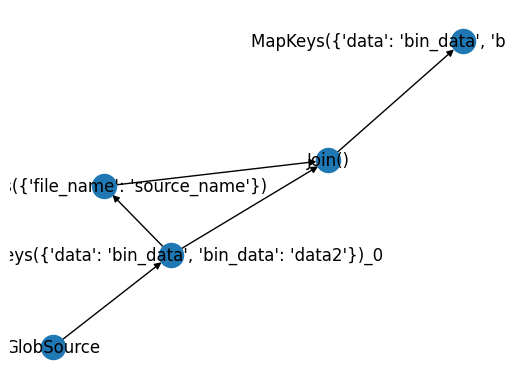

In [6]:
plt.subplot(111)
G = tracker.generate_graph()
nx.draw(G, labels=labels)

In [18]:
%debug

> /opt/venv/lib/python3.10/site-packages/networkx/drawing/nx_pydot.py(347)pydot_layout()
    345 
    346         if isinstance(node, list):
--> 347             node = node[0]
    348         pos = node.get_pos()[1:-1]  # strip leading and trailing double quotes
    349         if pos is not None:

*** SyntaxError: invalid syntax
*** SyntaxError: unexpected character after line continuation character
*** SyntaxError: invalid syntax
*** SyntaxError: invalid syntax
Join(ID:8752005337539:8752005337653)
    342     for n in G.nodes():
    343         str_n = str(n)
    344         node = Q.get_node(pydot.quote_id_if_necessary(str_n))
    345 
    346         if isinstance(node, list):
--> 347             node = node[0]
    348         pos = node.get_pos()[1:-1]  # strip leading and trailing double quotes
    349         if pos is not None:
    350             xx, yy = pos.split(",")
    351             node_pos[n] = (float(xx), float(yy))
    352     return node_pos


Join(ID:8752005337539

In [ ]:
nx.multipartite_layout

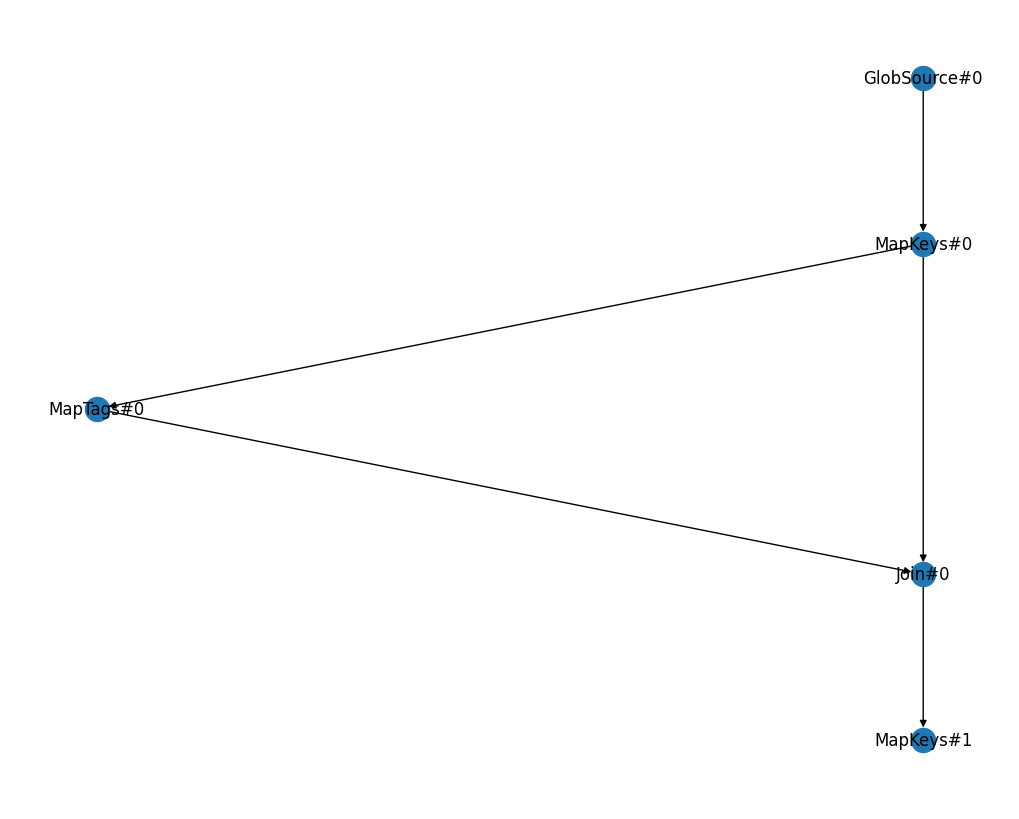

In [ ]:
# Create a hierarchical layout
# This ensures nodes are arranged in levels, with edges flowing downward


# Alternatively, you can use a simple layered approach:
# layers = {nodes[0]: 0, nodes[1]: 1, nodes[2]: 1, nodes[3]: 2}
# pos = nx.multipartite_layout(G, subset_key=lambda x: layers[x])

# Draw the graph
plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw(G, pos, with_labels=True)

In [ ]:
tracker.operations

In [ ]:
schema = dj.schema('enigma_orca_bridge_test')

In [ ]:
@schema
class BehavioralData(dj.Lookup):
    definition = """
    subject_id: int unsigned
    session_datetime: datetime
    ---
    behavior_data: varchar(128)  # path to behavioral data
    """
    contents = [
        (1, '2023-10-01 12:00:00', 'path/to/behavior_data_1'),
        (2, '2023-10-02 13:00:00', 'path/to/behavior_data_2'),
    ]

In [ ]:
for tag, packet in behavior_data.proj(..., animal_id='subject_id'):
    print(f'Tag: {tag}, Packet: {packet}')

In [ ]:
class Test():
    def __init__(self):
        a = []

In [ ]:
x = Test()

In [ ]:
y = Test()

In [ ]:
z = {}

In [ ]:
z[x] = 10

In [ ]:
x == y